In [21]:
import matplotlib.pyplot as plt
import numpy as np
import operator
from matplotlib import font_manager, rc
from matplotlib import style

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)
style.use('ggplot')

# 가상의 정당, 후보 데이터 생성 (list 안 tuple)

In [22]:
# 진한형님께서 Top 5의 후보만 준다고 생각하고 만들어보겠습니다!

data1=[(35.2,'더불어민주당'),       
       (20.2,'자유한국당'),
       (25.5,'바른미래당'),
       (14.2,'민주평화당'),
       (4.9,'정의당')]

data2=[(35.2,'더불어민주당 이형기'),
       (20.2,'자유한국당 예성준'),
       (25.5,'바른미래당 이원종'),
       (14.2,'민주평화당 송윤규'),
       (4.9,'정의당 곽노준')]

data3=[(35.2,'더불어민주당'),
       (20.2,'자유한국당'),
       (25.5,'무소속'),
       (14.2,'민주평화당'),
       (4.9,'바른미래당')]

data4=[(35.2,'무소속 서봉원'),
       (20.2,'자유한국당 예성준'),
       (25.5,'바른미래당 이원종'),
       (14.2,'민주평화당 송윤규'),
       (4.9,'정의당 곽노준')]

In [23]:
import random as rd
if rd.random() > 0.25:
    data=data1
elif rd.random()>0.5:
    data=data2
elif rd.random()>0.75:
    data=data3
else:
    data=data4

# data에 맞는 막대 그래프 색 부여하기

In [29]:
parties_color={'더불어민주당': '#2475FF',
       '자유한국당': '#CC0000',
       '바른미래당': '#00B4B4',  
       '민주평화당': '#FFA500',
       '정의당': '#FFCC00',
       '무소속': '#ffffff' }      

# 득표율 순으로 정당 sorting하기

In [30]:
sorted_parties=[]
sorted_parties_rates=[]
sorted_parties_color=[]

sorted_item=sorted(data,reverse=True)

for i in range(len(sorted_item)):
    sorted_parties.append(sorted_item[i][1].split(' ')[0]) #정당의 이름 가져오기
    sorted_parties_rates.append(sorted_item[i][0])

for i in sorted_parties:
    sorted_parties_color.append(parties_color[i]) #정당의 색 가져오기

print(sorted_parties)
print(sorted_parties_rates)
print(sorted_parties_color)

['더불어민주당', '바른미래당', '자유한국당', '민주평화당', '정의당']
[35.2, 25.5, 20.2, 14.2, 4.9]
['#2475FF', '#00B4B4', '#CC0000', '#FFA500', '#FFCC00']


# 득표율 순으로 후보 sorting하기 (input에 후보 data가 있다면)

In [31]:
if (len(data[0][1].split(' '))) >1:
    sorted_candidates=[]

    sorted_item=sorted(data,reverse=True)
    for i in range(len(sorted_item)):
        sorted_candidates.append(sorted_item[i][1].split(' ')[1]) #후보자들의 이름 가져오기

# 정당 plot 그리기(input에 후보 data가 없다면)

In [32]:
if (len(data[0][1].split(' '))) ==1:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.invert_yaxis()

    ypos = np.arange(len(sorted_parties))
    rects = plt.barh(ypos, sorted_parties_rates, align='center', height=0.6,color=sorted_parties_color,edgecolor='black')
    #edgecolor 는 무소속 bar graph를 흰색으로 칠할 때 배경과 더 명확히 구별하기 위해서 넣었습니다.
    plt.yticks(ypos, sorted_parties,fontsize=14)

    for i, rect in enumerate(rects):
        if rect.get_width() < 4:
            ax.text(1.46 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(sorted_parties_rates[i]) + '%',fontsize=14, ha='right', va='center')
        else:
            ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(sorted_parties_rates[i]) + '%',fontsize=14, ha='right', va='center')
    
    plt.xlabel('현재 득표율',fontsize=15)
    plt.show()

# 새로운 yticks 만들기 (input에 후보 data가 있다면)

In [33]:
if (len(data[0][1].split(' '))) >1:
    yticks_name=[]
    for i in range(len(sorted_candidates)):
        yticks_name.append(sorted_candidates[i]+' _'+'('+sorted_item[i][1].split(' ')[0][-3:]+')')
        #print(yticks_name)
    
    real_yticks=[]
    for item in yticks_name:
        real_yticks.append(item.replace("_","\n"))
        
    print(real_yticks)

['이형기 \n(민주당)', '이원종 \n(미래당)', '예성준 \n(한국당)', '송윤규 \n(평화당)', '곽노준 \n(정의당)']


# 후보 plot 그리기  (input에 후보 data가 있다면)

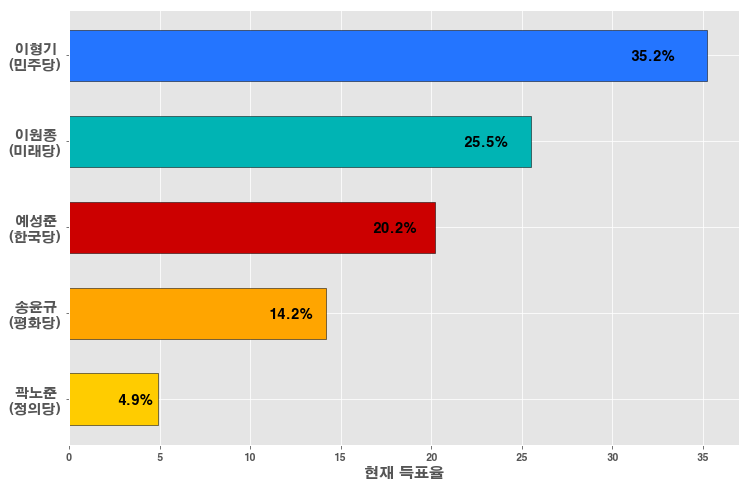

In [34]:
if (len(data[0][1].split(' '))) >1:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.invert_yaxis()

    ypos = np.arange(len(sorted_candidates))
    rects = plt.barh(ypos, sorted_parties_rates, align='center', height=0.6,color=sorted_parties_color,edgecolor='black')

    plt.yticks(ypos,real_yticks ,fontsize=14)

    for i, rect in enumerate(rects):
        if rect.get_width() < 4:
            ax.text(1.46 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(sorted_parties_rates[i]) + '%',fontsize=14, ha='right', va='center')
        else:
            ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(sorted_parties_rates[i]) + '%',fontsize=14, ha='right', va='center')
    plt.xlabel('현재 득표율',fontsize=15)
    plt.show()